https://www.bing.com/videos/search?q=time+series+analysis+sklearn&&view=detail&mid=CECFAC97A0C13BED267ECECFAC97A0C13BED267E&&FORM=VRDGAR&ru=%2Fvideos%2Fsearch%3Fq%3Dtime%2Bseries%2Banalysis%2Bsklearn%26FORM%3DHDRSC3

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
mbs = pd.read_excel("MapleBSCupHist.xlsx", index_col=[0], parse_dates=[0])

In [29]:
mbs.head()

,Quantity
Date,
2016-12-01,686
2017-01-01,20
2017-02-01,6830
2017-03-01,14213
2017-04-01,9400


In [39]:
# mbs.info
mbs_series_value = mbs.values
mbs_series_value

array([[  686],
       [   20],
       [ 6830],
       [14213],
       [ 9400],
       [10740],
       [10290],
       [ 8260],
       [19456],
       [ 9462],
       [12899],
       [13439],
       [11509],
       [12878],
       [13967],
       [19111],
       [12164],
       [ 8097],
       [10525],
       [10897],
       [14392],
       [15304],
       [24049],
       [19706],
       [16909],
       [17734],
       [18601],
       [18764],
       [17659],
       [16330],
       [12646],
       [16297],
       [18601],
       [18997],
       [23166],
       [21995],
       [28056],
       [34825],
       [30823],
       [44551],
       [27123],
       [ 8310],
       [11779],
       [13380],
       [22498],
       [32002],
       [32410],
       [30688],
       [12943]], dtype=int64)

In [31]:
mbs.describe()

,Quantity
count,49.000000
mean,17048.591837
std,8763.888138
min,20.000000
25%,11509.000000
50%,15304.000000
75%,19706.000000
max,44551.000000


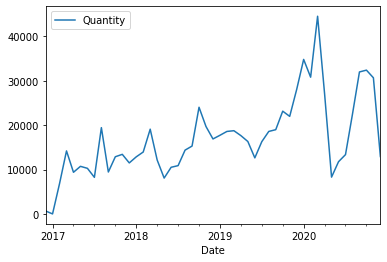

In [32]:
mbs.plot()

In [36]:
#Smoothing or remove noise.  Finding out the moving average
mbs_5_avg = mbs.rolling(window=5).mean()


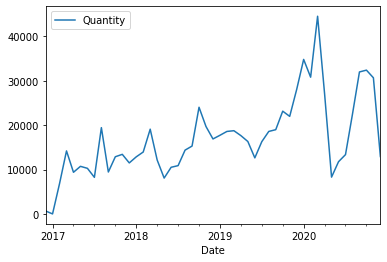

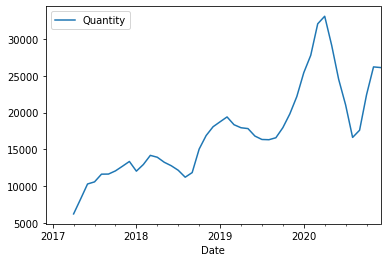

In [37]:
mbs.plot()
mbs_5_avg.plot()

### Option 1:  Baseline model

In [43]:
# Baseline model - the previous value is the best reflection of the future
# Note:  Because you have a SERIES, you have to convert it back to a dataframe to use CONCAT funtion

value = pd.DataFrame(mbs_series_value)
mbs_baseline = pd.concat([value, value.shift(1)], axis=1)

In [49]:
mbs_baseline.head()
mbs_baseline.columns=("Actual","Forecast")
mbs_baseline.tail()

,Actual,Forecast
44,22498,13380.0
45,32002,22498.0
46,32410,32002.0
47,30688,32410.0
48,12943,30688.0


In [51]:
# Calculate error
from sklearn.metrics import mean_squared_error
import numpy as np

In [53]:
#Take out first value due to NAN
mbs_baseline_test = mbs_baseline[1:]
mbs_baseline_error = mean_squared_error(mbs_baseline_test.Actual , mbs_baseline_test.Forecast)

In [55]:
# To calculate error, better ti use the square root
mbs_baseline_error
np.sqrt(mbs_baseline_error)

# If you compare to the standard deviation using describe(), its similar.  Now with this baseline, any other model you 
# use, the error should be BELOW 6605!!  Let's compare to ARIMA model!

6605.822099040109

### ARIMA model

In [56]:
# To understand ARIMA, see video at minute 39-44
# ARIMA - Auto Regressive(p) Integrated (d) Moving Average(q)
# Moving average = nothing but the smoothing part, taking out the noise
# Autoregressive = assumes the current value is correlated to the previous value and the previous value is the 
#                  best reflection of the current 
# Integrated = Order of difference (needs to STATIONARY, removes TREND OR SEASONALITY components)

In [57]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

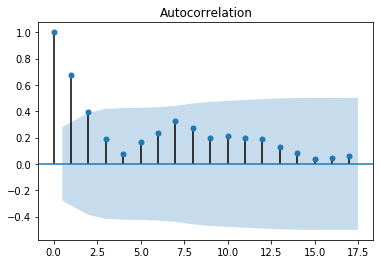

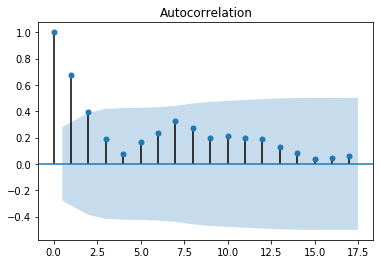

In [58]:
# plot_acf is used to identify parameter Q

plot_acf(mbs)

Looking at the chart, you can experiment with 2 and definitely by 3 for parameter Q

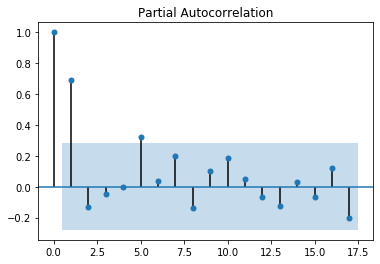

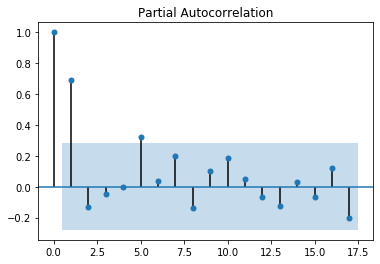

In [60]:
# plot_pacf is used to identify parameter P
plot_pacf(mbs)

Looking at the chart, definitely start using 2

In [62]:
# p = 2 ; d=1 ; q=2 or 3
mbs.size

49

In [79]:
# create train and test data
train_mbs = mbs[0:40]
test_mbs = mbs[40:49]
test_mbs.size

9

In [65]:
#train_mbs.size
train_mbs.head()

,Quantity
Date,
2016-12-01,686
2017-01-01,20
2017-02-01,6830
2017-03-01,14213
2017-04-01,9400


In [66]:
from statsmodels.tsa.arima_model import ARIMA

In [69]:
mbs_arima = ARIMA(train_mbs, order=(2,1,2))

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [70]:
# fit the model
mbs_arima_fit = mbs_arima.fit()

In [72]:
# Run AIC.  Whe you experiment to the various combination, you want the lowest AIC. Smaller is better
mbs_arima_fit.aic

779.1151286505784

In [80]:
# Forecast cups using ARIMA model (2,1,2).  Give us the next 9 months.  Then you can compare to the TEST set
cups_forecast = mbs_arima_fit.forecast(steps = 9)[0]

In [81]:
cups_forecast

array([45878.89412116, 47034.28502215, 48125.96559477, 49308.70343765,
       50578.20646807, 51824.28340327, 52998.8382366 , 54156.60526491,
       55356.59011508])

In [83]:
test_mbs

,Quantity
Date,
2020-04-01,27123
2020-05-01,8310
2020-06-01,11779
2020-07-01,13380
2020-08-01,22498
2020-09-01,32002
2020-10-01,32410
2020-11-01,30688
2020-12-01,12943


How does the forecast compare to the test_mbs?  Pretty bad!  Forecast 45K, actual 27.  Forecast 47K, actual 8K etc.  Anyway, let's run the square root error so that we can compare to baseline model

In [84]:
np.sqrt(mean_squared_error(test_mbs, cups_forecast))

30583.831399197512

So, this model is pretty bad...its worse than the baseline model! (6605).  You may need to work on the combinations!